In [50]:
from qiskit import QuantumCircuit

In [51]:
# Create quantum circuit with 3 qubits and 3 classical bits
# (we'll explain why we need the classical bits later)
qc = QuantumCircuit(3, 3)
qc.draw()  # returns a drawing of the circuit

q_0: 
     
q_1: 
     
q_2: 
     
c: 3/

In [52]:
qc = QuantumCircuit(3, 3)
# measure qubits 0, 1 & 2 to classical bits 0, 1 & 2 respectively
qc.measure([0,1,2], [0,1,2])
qc.draw()

┌─┐      
q_0: ┤M├──────
     └╥┘┌─┐   
q_1: ─╫─┤M├───
      ║ └╥┘┌─┐
q_2: ─╫──╫─┤M├
      ║  ║ └╥┘
c: 3/═╩══╩══╩═
      0  1  2

In [53]:
from qiskit.providers.aer import AerSimulator
sim = AerSimulator()   # make new simulator object

In [54]:
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
result.get_counts()    # interpret the results as a "counts" dictionary

{'000': 1024}

In [55]:
# Create quantum circuit with 3 qubits and 3 classical bits:
qc = QuantumCircuit(3, 3)
qc.x([0, 1])  # Perform X-gates on qubits 0 & 1
qc.measure([0, 1, 2], [0, 1, 2])
qc.draw()    # returns a drawing of the circuit

┌───┐┌─┐   
q_0: ┤ X ├┤M├───
     ├───┤└╥┘┌─┐
q_1: ┤ X ├─╫─┤M├
     └┬─┬┘ ║ └╥┘
q_2: ─┤M├──╫──╫─
      └╥┘  ║  ║ 
c: 3/══╩═══╩══╩═
       2   0  1

In [56]:
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
result.get_counts()    # interpret the results as a "counts" dictionary

{'011': 1024}

In [57]:
# Create quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.cx(0, 1)            # CNOT controlled by qubit 0 and targeting qubit 1
qc.measure([0, 1], [0, 1])
display(qc.draw())     # display a drawing of the circuit

job = sim.run(qc)      # run the experiment
result = job.result()  # get the results

# interpret the results as a "counts" dictionary
print("Result: ", result.get_counts())

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

Result:  {'11': 1024}


In [58]:
# Half adder quantum circuit.

qc = QuantumCircuit(4, 2)

# q0 and q1 are the input.
qc.x(0)          # q0 = NOT(q0)
qc.x(1)          # q1 = NOT(q1)

# q2 and q3 are initialized to 0.
qc.cx(0, 2)      # q2 = XOR(q0, q2)
qc.cx(1, 2)      # q2 = XOR(q1, q2)
qc.ccx(0, 1, 3)  # q3 = AND(q0, q1)

qc.measure(2, 0) # b0 = q2
qc.measure(3, 1) # b1 = q3
display(qc.draw())

job = sim.run(qc)     # run the experiment
result = job.result() # get the results
result.get_counts()

┌───┐                     
q_0: ┤ X ├──■─────────■────────
     ├───┤  │         │        
q_1: ┤ X ├──┼────■────■────────
     └───┘┌─┴─┐┌─┴─┐  │  ┌─┐   
q_2: ─────┤ X ├┤ X ├──┼──┤M├───
          └───┘└───┘┌─┴─┐└╥┘┌─┐
q_3: ───────────────┤ X ├─╫─┤M├
                    └───┘ ║ └╥┘
c: 2/═════════════════════╩══╩═
                          0  1

{'10': 1024}

In [59]:
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(2)

qc.x(0)      # q0 = NOT(q0)
qc.h(1)      # q1 = H(q1)
# Entangle the qubits 0 and 1.
qc.cx(1, 0)  # q0 = XOR(q0, q1)

# This calculates what the state vector of our qubits would be
# after passing through the circuit 'qc'
ket = Statevector(qc)

# The code below writes down the state vector.
# Since it's the last line in the cell, the cell will display it as output
ket.draw()

'Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,\n             0.        +0.j],\n            dims=(2, 2))'

In [60]:
qc = QuantumCircuit(2)

qc.h(0)      # q0 = H(q0)
qc.h(1)      # q1 = H(q1)

display(qc.draw())

# This calculates what the state vector of our qubits would be
# after passing through the circuit 'qc'
ket = Statevector(qc)

# The code below writes down the state vector.
# Since it's the last line in the cell, the cell will display it as output
ket.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘

'Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],\n            dims=(2, 2))'

In [61]:
qc = QuantumCircuit(1)

qc.h(0)      # q0 = H(q0)

display(qc.draw())

# This calculates what the state vector of our qubits would be
# after passing through the circuit 'qc'
ket = Statevector(qc)

# The code below writes down the state vector.
# Since it's the last line in the cell, the cell will display it as output
display(ket.draw())

┌───┐
q: ┤ H ├
   └───┘

'Statevector([0.70710678+0.j, 0.70710678+0.j],\n            dims=(2,))'

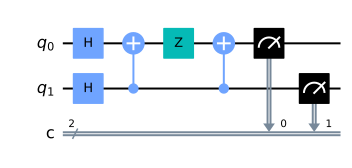

<IPython.core.display.Latex object>

{'11': 251, '10': 253, '00': 245, '01': 275}

In [62]:
qc = QuantumCircuit(2, 2)

# Everything after the H gate will change the state vector, but not the
# measurements.
qc.h(0)          # q0 = H(q0)
qc.h(1)          # q1 = H(q1)
# This has no effect:
qc.cx(1, 0)      # q0 = XOR(q1, q0)
# But it has:
qc.z(0)          # q0 = -|1> of q0 is |1>, |0> otherwise
# Now we can perform cx:
qc.cx(1, 0)      # q0 = XOR(q1, q0)

# This calculates what the state vector of our qubits would be
# after passing through the circuit 'qc'.
# We can't use the Statevector after measuring.
ket = Statevector(qc)

qc.measure(0, 0) # b0 = q2
qc.measure(1, 1) # b1 = q3
display(qc.draw(output='mpl')) # Draw the cirtuit to an SVG.

# The code below writes down the state vector.
# Since it's the last line in the cell, the cell will display it as output
display(ket.draw(output='latex')) # Use LaTeX to draw the ket.

job = sim.run(qc)     # run the experiment
result = job.result() # get the results
result.get_counts()

In [63]:
from qiskit import Aer
backend = Aer.get_backend('aer_simulator')

<IPython.core.display.Latex object>

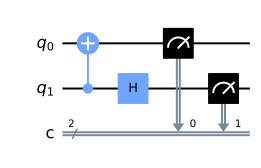

{'00': 1024}

In [64]:
# Alice and Bob, but with quantum mechanics.

# The message
MESSAGE = '00'

# Alice encodes the message
qc_alice = QuantumCircuit(2, 2)
if MESSAGE[-1] == '1':
  qc_alice.x(0)
if MESSAGE[-2] == '1':
  qc_alice.x(1)

ket = Statevector(qc_alice)
display(ket.draw(output='latex'))

# then she creates entangled states
qc_alice.h(1)
qc_alice.cx(1,0)

qc_bob = QuantumCircuit(2, 2)
# Bob disentangles
qc_bob.cx(1,0)
qc_bob.h(1)
# Then measures
qc_bob.measure([0, 1], [0, 1])

display(qc_bob.draw(output='mpl'))

backend.run(qc_alice.compose(qc_bob)).result().get_counts()

In [65]:
MESSAGE = '11'

qc_alice = QuantumCircuit(2, 2)

qc_alice.h(1)
qc_alice.cx(1, 0)

# Note that this part has changed to take advantage of the entangled state.
if MESSAGE[-1] == '1':
  qc_alice.x(1) # Before: qc_alice.x(0)
if MESSAGE[-2] == '1':
  qc_alice.z(1) # Before: qc_alice.x(1)

# As we are storing the message only in the qubit q1, Alice could have
# sended the qubit q0 as soon as she had the entangled pair, even
# before she knew the message!

ket = Statevector(qc_alice)
display(ket.draw(output='latex'))

# Since Bob is receiving the same states as before its circuit
# doesn't need to change.

backend.run(qc_alice.compose(qc_bob)).result().get_counts()

<IPython.core.display.Latex object>

{'11': 1024}

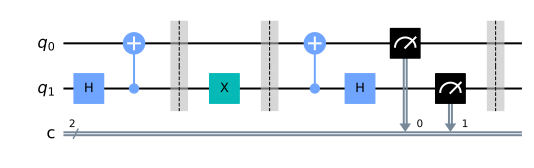

{'01': 1024}

In [66]:
# The process above can be modified so Alice send only 1 qubit to Bob:
# A third party can directly send one qubit to Bob, and then the
# other to Alice
# Alice can encode her two qubit message by manipulating just
# this single qubit, and send only this one qubit to Bob

# Charlie is the third party
qc_charlie = QuantumCircuit(2,2)

qc_charlie.h(1)
qc_charlie.cx(1, 0)

# Alice cuircuit
MESSAGE = '01'

qc_alice = QuantumCircuit(2, 2)

# Alice can send 2 bits of information to Bob only using 1 qubit!

if MESSAGE[-1] == '1':
  qc_alice.x(1)
if MESSAGE[-2] == '1':
  qc_alice.z(1)

# Improve circuit visualization
qc_bob.barrier()
qc_alice.barrier()
qc_charlie.barrier()

complete_qc = qc_charlie.compose(qc_alice.compose(qc_bob))
display(complete_qc.draw(output='mpl'))
backend.run(complete_qc).result().get_counts()